# Case Enem

**Problema:** como lidar com os NAs da coluna NU_NOTA_MT? se precisasse das notas desaparecidas dessa coluna, qual seria o tratamento?
<br>

**Observações:**
1. O número de matrícula é referente ao Enem 2016, trata-se de uma máscara e não o seu número de inscrição original no Enem. O mesmo NU_INSCRICAO para anos diferentes não identifica o mesmo participante no exame, não permite o acesso aos dados cadastrais como nome, endereço, RG etc, nem identifica o mesmo participante em microdados de pesquisas diferentes.
2. A idade é referente à idade do inscrito em 31/12/2016. Idades inferiores a 10 anos e superiores a 100 anos estão com o campo vazio na base.

In [2]:
# importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# ler as bases de dados

dicionario_colunas = pd.read_excel('dicionario_colunas_enem_alterado.xlsx')
base_enem = pd.read_excel('enem.xlsx')

## tratamento das bases

In [23]:
# checar o número de linhas e de colunas de cada dataframe

pd.DataFrame({
    'base': ['base_enem', 'dicionario_colunas'],
    'n_colunas': [len(base_enem.columns), len(dicionario_colunas.columns)],
    'n_linhas': [len(base_enem), len(dicionario_colunas)]
})


,base,n_colunas,n_linhas
0,base_enem,29,18306
1,dicionario_colunas,7,130


In [38]:
# verificar a base de dados dicionario_colunas

dicionario_colunas.head()

,variavel,descricao_variavel,categoria,descricao_categoria,n_caracteres,tipo_variavel,tipo_dado
0,NU_INSCRICAO,Número de inscrição1,NaN,NaN,12,Numérica,participante
1,SG_UF_RESIDENCIA,Sigla da Unidade da Federação de residência,NaN,NaN,2,Alfanumérica,participante
2,NU_IDADE,Idade2,NaN,NaN,3,Numérica,participante
3,TP_SEXO,Sexo,M,Masculino,1,Alfanumérica,participante
4,TP_SEXO,Sexo,F,Feminino,1,Alfanumérica,participante


In [47]:
# gerar base para criar o depara

get_dict = pd.DataFrame({
    'variavel': base_enem.columns.to_list()
})

get_dict = get_dict.merge(dicionario_colunas[['variavel', 'descricao_variavel']].drop_duplicates())

get_dict

,variavel,descricao_variavel
0,NU_INSCRICAO,Número de inscrição1
1,SG_UF_RESIDENCIA,Sigla da Unidade da Federação de residência
2,NU_IDADE,Idade2
3,TP_SEXO,Sexo
4,TP_COR_RACA,Cor/raça
5,TP_NACIONALIDADE,Nacionalidade
6,TP_ST_CONCLUSAO,Situação de conclusão do Ensino Médio
7,TP_ANO_CONCLUIU,Ano de Conclusão do Ensino Médio
8,TP_ESCOLA,Tipo de escola do Ensino Médio
9,TP_ENSINO,Tipo de instituição que concluiu ou concluirá ...


## análise exploratória

In [26]:
# o que significa a coluna a ser investigada?

dicionario_colunas[dicionario_colunas['variavel'] == 'NU_NOTA_MT']

,variavel,descricao_variavel,categoria,descricao_categoria,n_caracteres,tipo_variavel,tipo_dado
58,NU_NOTA_MT,Nota da prova de Matemática,NaN,NaN,9,Numérica,prova objetiva


### verificação de NAs

<AxesSubplot:>

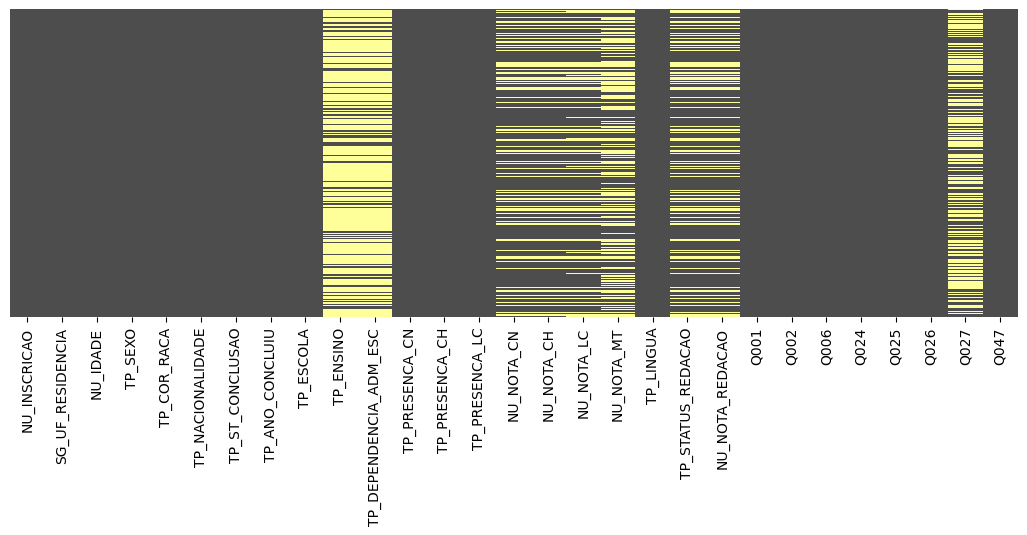

In [46]:
# verificar onde estão os NAs das linhas na base_enem

plt.figure(figsize = (13,4))
sns.heatmap(base_enem.isnull(), yticklabels = False, cbar = False, cmap = ['#4d4d4d', '#ffff99'])

aparentemente a coluna da nota de matemática tem mais valores vazios do que as colunas das notas das outras áreas de conhecimento.

In [57]:
# o que significam as colunas que possuem muitos valores vazios?

print('TP_ENSINO =', get_dict[get_dict['variavel'] == 'TP_ENSINO']['descricao_variavel'].to_list())
print('TP_DEPENDENCIA_ADM_ESC =', get_dict[get_dict['variavel'] == 'TP_DEPENDENCIA_ADM_ESC']['descricao_variavel'].to_list())
print('Q027 =', get_dict[get_dict['variavel'] == 'Q027']['descricao_variavel'].to_list())

TP_ENSINO = ['Tipo de instituição que concluiu ou concluirá o Ensino Médio ']
TP_DEPENDENCIA_ADM_ESC = ['Dependência administrativa (Escola)']
Q027 = ['Com que idade você começou a exercer uma atividade remunerada?']


### distribuições das variáveis